In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')


id="8706835"
# Función para crear el número semilla
def numero_identificacion(id):
    if len(id)>=8: # condicion por si el id tiene mas de 8 chifras
        id_nuevo=id[-8:] # nos quedaremos con las primeras ocho empezando desde la derecha
    else:     # en el caso contrario donde el id es menos de 8 chifras
        id_nuevo=(id*8)[:8] 
     #creamos una lista donde sustituimis los numeros que son<2 por 2
    semilla_lista = [int(i) if int(i)>=2 else 2 for i in id_nuevo] # transformar string a int para poder comparar "int(i)"
    return semilla_lista

# Probar la funcion
s= numero_identificacion(id) # el resultado es una lista
semilla=int("".join(map(str,s)))
semilla



87268358

In [2]:
d1, d2, d3, d4= s[0], s[1], s[2], s[3]


# Calcular los parámetros según las especificaciones
n_samples = 200 + 10 * d1
n_features = 10 + d2 + d3
n_informative = 10 + d2
bias = 2
noise = 10 * d4
random_state = semilla

print(f"Parámetros para make_regression:")
print(f"n_samples es el número de observaciones en el conjunto de datos {n_samples}")
print(f"n_features es el número total de variables predictoras {n_features}")
print(f"n_informative es el número de variables predictoras que realmente tienen relación con la variable respuesta {n_informative}")
print(f"bias es el término constante (intercepto) que se suma a la variable respuesta {bias}")
print(f"noise es la desviación estándar del ruido gaussiano añadido a la variable respuesta {noise}")
print(f"random_state es la semilla para la reproducibilidad de los resultados {semilla}")
print(f"shuffle indica si se deben mezclar las muestras (False = no mezclar)")
# Crear el conjunto de datos
X, y = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    bias=bias,
    noise=noise,
    random_state=random_state,
    shuffle=False
)

print(f"\nDimensiones del conjunto de datos:")
print(f"X shape: {X.shape}")
y=y.reshape(y.shape[0],1)
print(f"y shape: {y.shape}")

Parámetros para make_regression:
n_samples es el número de observaciones en el conjunto de datos 280
n_features es el número total de variables predictoras 19
n_informative es el número de variables predictoras que realmente tienen relación con la variable respuesta 17
bias es el término constante (intercepto) que se suma a la variable respuesta 2
noise es la desviación estándar del ruido gaussiano añadido a la variable respuesta 60
random_state es la semilla para la reproducibilidad de los resultados 87268358
shuffle indica si se deben mezclar las muestras (False = no mezclar)

Dimensiones del conjunto de datos:
X shape: (280, 19)
y shape: (280, 1)


# Creat datos con $Pandas$

In [3]:
df=pd.DataFrame(X,columns=[f'X{i+1}' for i in range(X.shape[1])])
df['y'] = y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      280 non-null    float64
 1   X2      280 non-null    float64
 2   X3      280 non-null    float64
 3   X4      280 non-null    float64
 4   X5      280 non-null    float64
 5   X6      280 non-null    float64
 6   X7      280 non-null    float64
 7   X8      280 non-null    float64
 8   X9      280 non-null    float64
 9   X10     280 non-null    float64
 10  X11     280 non-null    float64
 11  X12     280 non-null    float64
 12  X13     280 non-null    float64
 13  X14     280 non-null    float64
 14  X15     280 non-null    float64
 15  X16     280 non-null    float64
 16  X17     280 non-null    float64
 17  X18     280 non-null    float64
 18  X19     280 non-null    float64
 19  y       280 non-null    float64
dtypes: float64(20)
memory usage: 43.9 KB


La información que se observa de "df.info()" es que todas las variables son numeros reales y no hay datos faltantes, y como se aclara antes hay 19 variables predictoras y la variable de respuesta.

In [4]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,y
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,-0.004759,-0.019009,0.035628,0.045325,0.038381,-0.047100,0.038827,-0.026594,0.092553,-0.161918,0.080934,-0.040190,0.103473,0.007582,0.157036,0.007044,0.111276,-0.033444,0.086991,8.888066
std,0.987828,1.078098,0.962481,0.992405,0.977484,1.012451,1.031004,1.016827,0.924506,1.008187,1.044246,1.059504,1.024049,0.988622,1.005178,1.003220,1.066922,1.029526,0.910676,209.820052
min,-3.729014,-3.589389,-3.225450,-2.898614,-2.467099,-3.377477,-2.601961,-2.358691,-2.474440,-2.862434,-3.064997,-3.156415,-2.734902,-2.563057,-2.625286,-2.750926,-3.116811,-2.565611,-2.203249,-626.092227
25%,-0.699065,-0.694717,-0.630861,-0.583189,-0.721837,-0.752415,-0.708796,-0.771503,-0.527941,-0.902623,-0.681795,-0.732343,-0.587459,-0.678381,-0.581638,-0.652035,-0.540674,-0.707247,-0.601632,-113.163818
50%,-0.010076,-0.045366,0.043695,0.037656,0.099992,0.004284,0.034370,-0.018360,0.061168,-0.229343,0.126520,0.016991,0.107838,-0.004286,0.209440,0.013377,0.136752,-0.055287,0.095143,4.611437
75%,0.622913,0.715814,0.628408,0.643548,0.782246,0.680191,0.751942,0.653880,0.716439,0.491690,0.847745,0.662405,0.810403,0.631562,0.914357,0.660105,0.811769,0.618607,0.723850,141.936555
max,2.745422,2.875543,2.801200,2.944299,2.128891,2.435473,2.470161,3.595413,2.859384,3.454610,2.879965,2.707833,3.164593,3.183592,3.485445,2.408273,3.131316,3.688189,2.331849,542.301066


 De el comando "df.describe" se puede sacar informaciones estadisticos descriptivos como  la media, el minimum , el maximo, desviacion estandar ,....

In [5]:
print("\n=== PRIMERAS 5 OBSERVACIONES ===")

print(df.head())


=== PRIMERAS 5 OBSERVACIONES ===
         X1        X2        X3        X4        X5        X6        X7  \
0  0.855183  0.112392  0.583374 -1.088228 -1.500170  1.222791  0.934566   
1  0.160581 -1.529507  0.300211  0.488109  0.840401  1.695671  0.554765   
2  1.532309 -0.347702 -0.105372 -0.561063 -0.006869 -0.298001 -0.275785   
3 -0.455927 -1.045675 -1.937965 -0.984844  0.781380 -1.032006  1.222664   
4  0.350305 -1.823782 -1.366177  1.348861 -0.743758 -2.857326  1.189374   

         X8        X9       X10       X11       X12       X13       X14  \
0  0.717749  0.848476 -0.933900  0.887294 -2.383969  0.226008  0.372797   
1 -0.413608 -0.994846 -0.486464 -3.064997 -0.972612 -0.015312 -0.115151   
2  1.672413  1.002279 -0.643131 -0.773284 -0.199034 -0.485050  1.672384   
3 -0.133569  0.410466 -0.590372  1.957014 -0.545492  0.003680 -1.193583   
4  0.038039 -0.177811 -0.315020  1.044377 -1.494729  0.555408  0.980979   

        X15       X16       X17       X18       X19           y 

In [6]:
print("\n=== ÚLTIMAS 5 OBSERVACIONES ===")
print(df.tail())


=== ÚLTIMAS 5 OBSERVACIONES ===
           X1        X2        X3        X4        X5        X6        X7  \
275 -0.309288 -1.066751 -0.768130  2.054549  1.995106  0.554552  1.521779   
276 -0.157758  0.707305  1.660733  0.159098  0.005156 -0.094230  1.665100   
277 -0.075753 -1.507486 -0.108689  0.370591 -0.788956 -1.470075 -1.477169   
278 -0.908916 -1.719509  1.471938  0.204963  0.538225 -1.494552  1.323911   
279 -0.016631  1.168986  0.444328 -0.831540 -0.329061  0.407426  0.925973   

           X8        X9       X10       X11       X12       X13       X14  \
275  1.148486  0.400907  0.770189  0.775474  0.716684 -0.312851  0.621111   
276  0.398339 -0.435998 -1.588813 -0.112389  0.048144  1.008695  0.178203   
277 -1.591347  0.399196  2.323414 -0.614495 -1.664267 -0.502058  0.836389   
278  0.128199  1.179069 -0.282856 -0.405230  1.824492 -1.033659 -1.677901   
279  2.464591 -0.646185  0.129511  0.841572 -0.443077 -0.299821  1.937613   

          X15       X16       X17       X

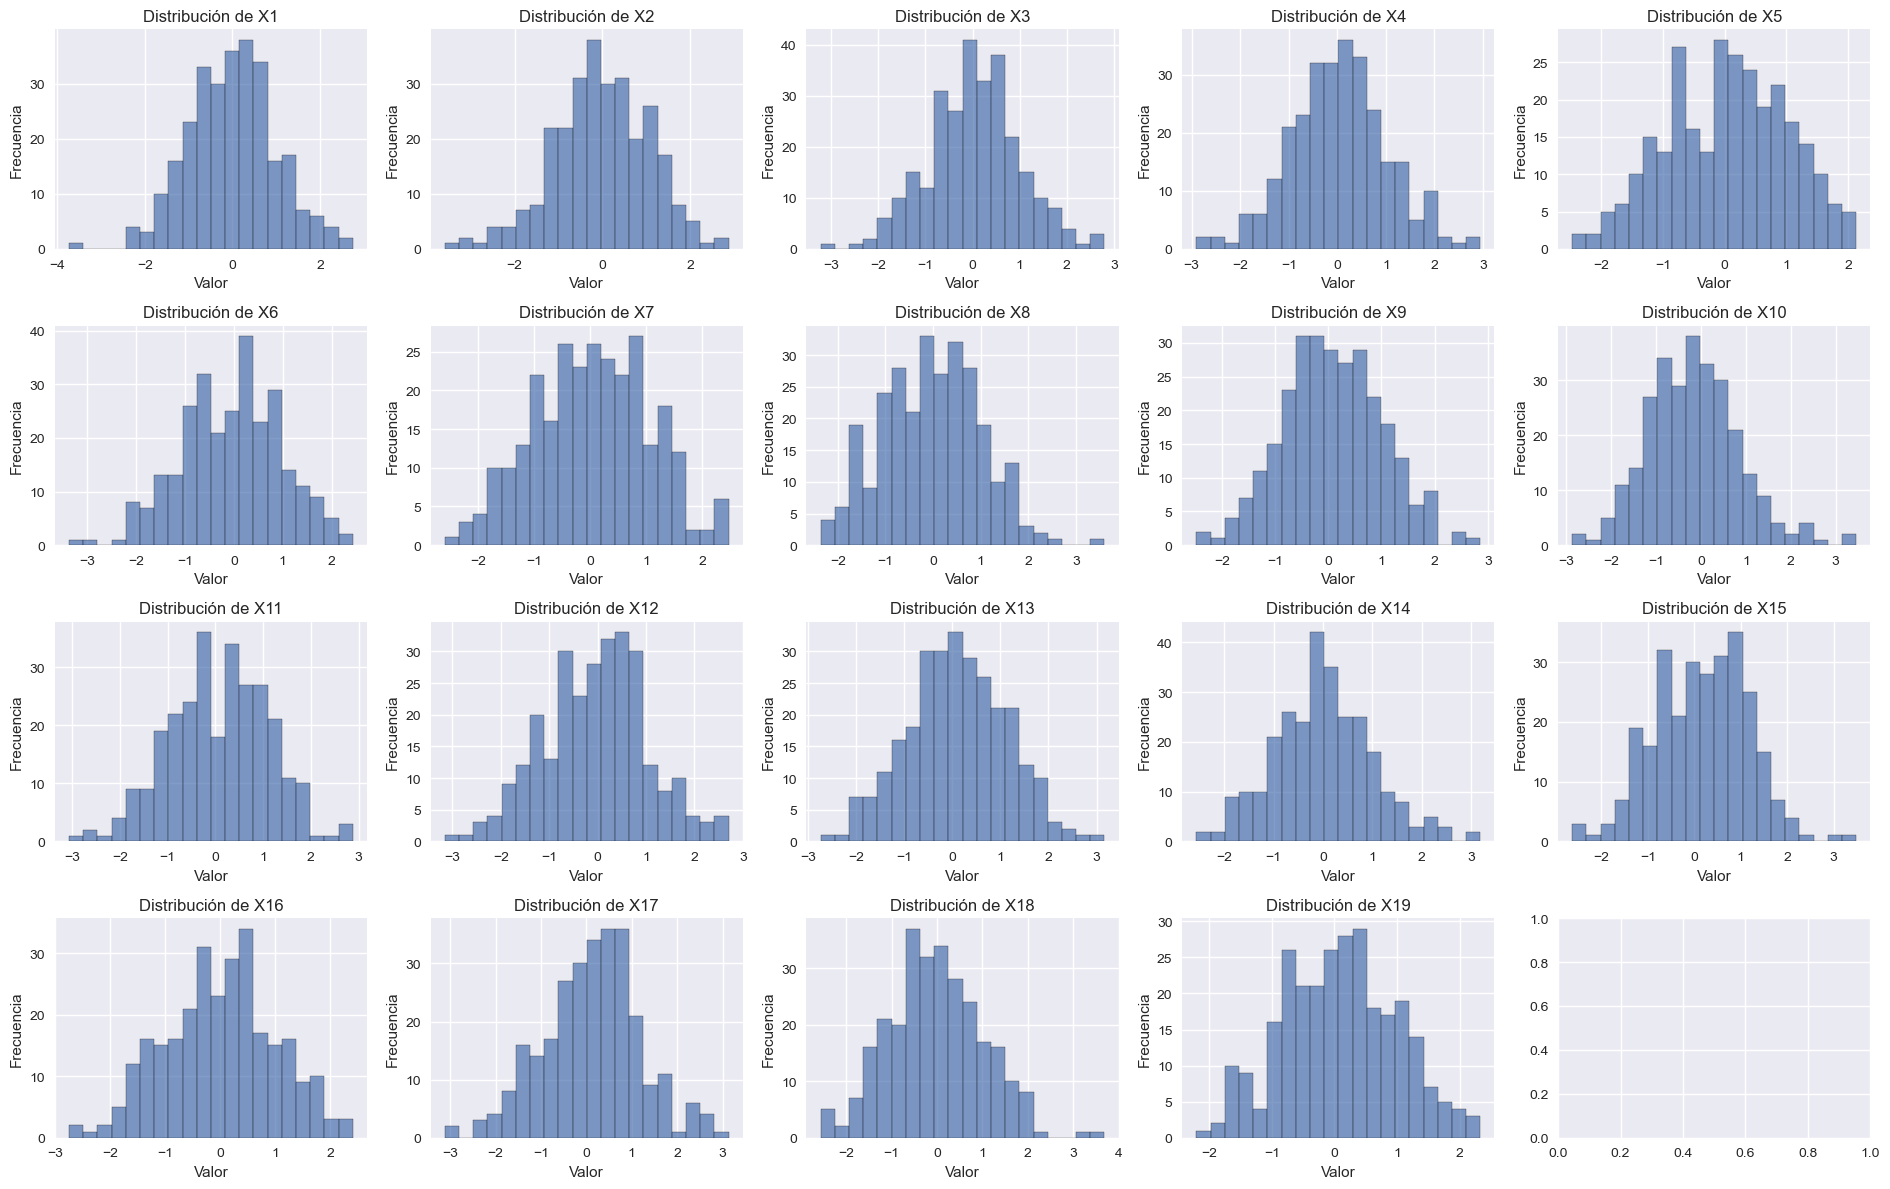

In [7]:
# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8')# Comun en ciencia de datos, hace que los hist. sean mas legibles y profesionales
fig, axes = plt.subplots(4, 5, figsize=(19, 12))
axes = axes.ravel() #trasnforama axes de 2D a 1D para usarla en bouv¡cle for
# Usar la cantidad real de columnas de X (19)
num_predictoras = X.shape[1]

for i in range(num_predictoras):
    axes[i].hist(df[f'X{i+1}'], bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribución de X{i+1}')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Distribucion Normal:
Gracias al usar la funcion "make_regression", se genera variables predictoras a partir de una distribución normal estándar, ya que tenemos la normalidad de los datos
### Escala y centrado:
Las variables estan escaladas entre -3 y 3 y tienen una media cercana a 0, lo que no segnifica que  necesita aplicar una normalización adicional antes de entrenar como $standardScaler$. Lo que es muy beneficioso para los modelos de $Ridge$, $Lasso$ y $Red Elástica$ que realizara mas aselante.
### Outlier
Las colas de los histogramas no muestran barras aisladas muy lejos del centro lo que garantiza la estabilidad del modelo  de regresión lineal, ademas, el análisis de p-valor sea más fiable.

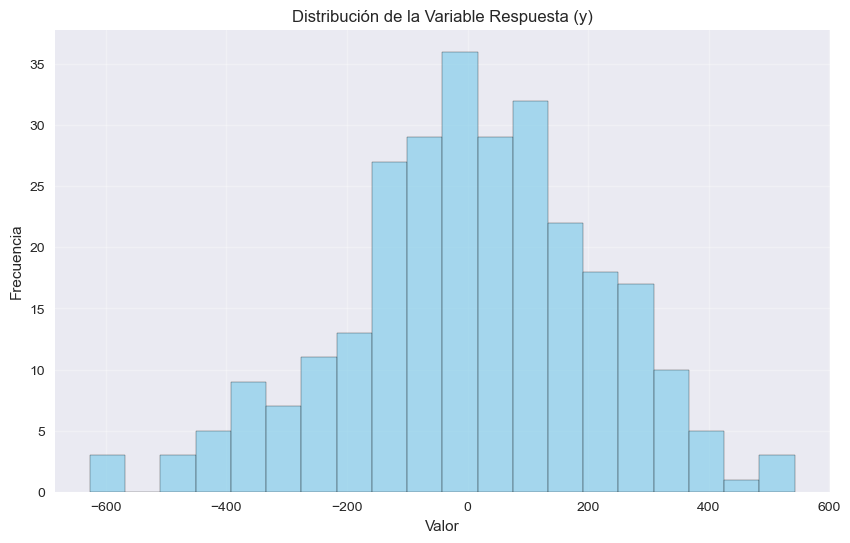

In [8]:
# Gráfica de la variable respuesta
plt.figure(figsize=(10, 6))
plt.hist(df['y'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribución de la Variable Respuesta (y)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

La misma observación anterior la variable de respuesta Y sigue la distribucion normal centrada en 0

## La correlacion entre las variables

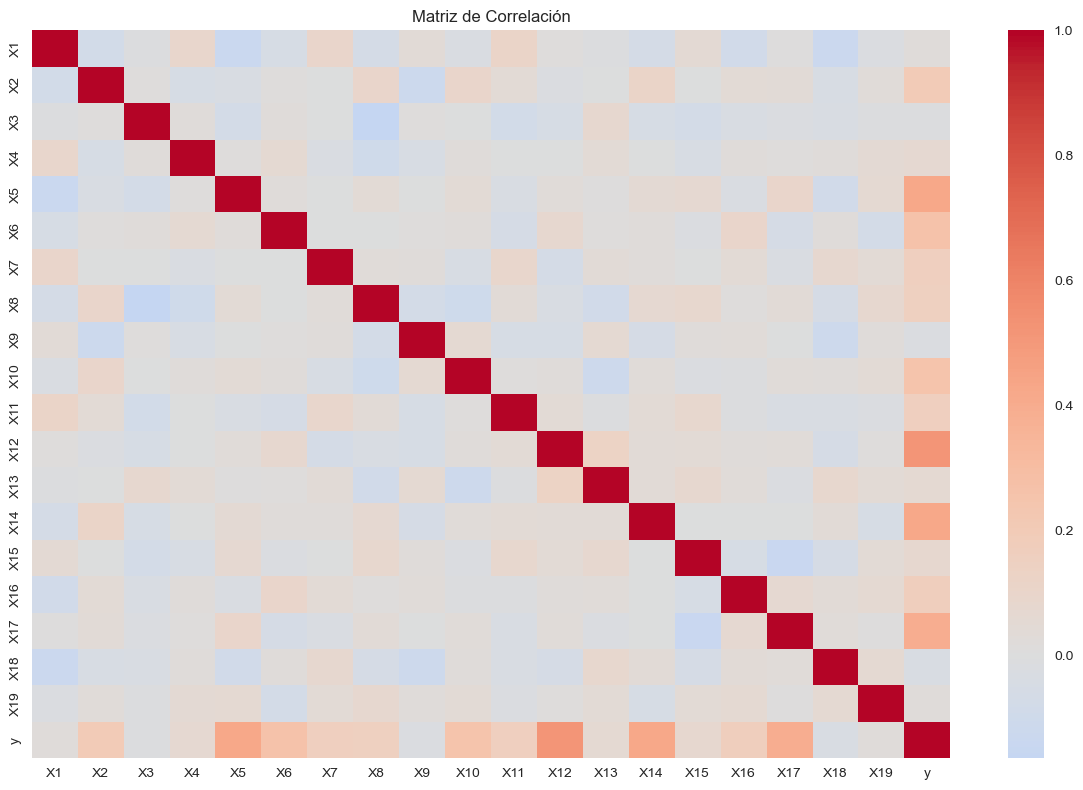

In [9]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()


Se observa que existe una baja correlación entre las variable predictoras debido a que los cuadros fuera de la diagonal son de color gris claro, ya indica que las variables no están duplicado informacion entre sí.En la última fila (la fila de la variable respuesta $y$), se observan algunos cuadros con un tono naranja más intenso (por ejemplo, en $X_5$, $X_{12}$, $X_{14}$, $X_{17}$), esas son las variables que tienen una relación lineal más fuerte con la variable objetivo. 

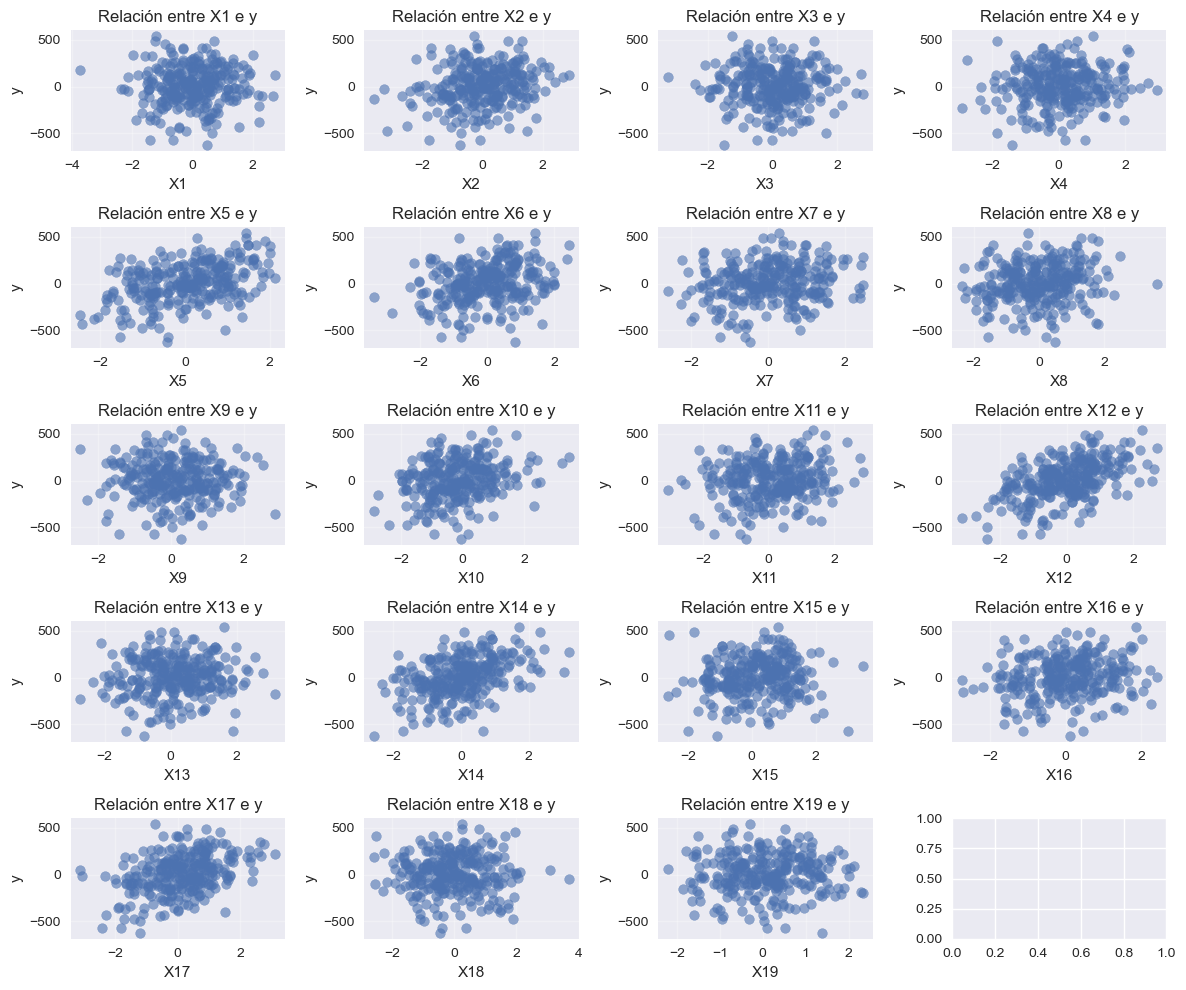

In [10]:
# Gráficas de dispersión entre las variables predictoras y la respuesta
fig, axes = plt.subplots(5, 4, figsize=(12, 10))
axes = axes.ravel()

for i in range(19):
    axes[i].scatter(df[f'X{i+1}'], df['y'], alpha=0.6)
    axes[i].set_xlabel(f'X{i+1}')
    axes[i].set_ylabel('y')
    axes[i].set_title(f'Relación entre X{i+1} e y')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Al observar los scatter plots (especialmente los de $X_5, X_{12}, X_{14}$ y $X_{17}$), se nota una tendencia lineal clara, donde los puntos forman una diagonal ascendente, lo que confirma visualmente una fuerte relación lineal con la variable respuesta $y$, exactamente como muestra la matrice de coorelacion anterior.

# División del conjunto de datos

In [11]:
# Dividir en conjunto de entrenamiento (200 observaciones) y validación
X_train= X[:200]
X_test = X[200:]
y_train= y[:200]
y_test = y[200:]
print(f"Entrenamiento: X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


Entrenamiento: X_train shape: (200, 19), X_test shape: (80, 19)


# Mínimos Cuadrados Ordinarios (OLS)

El método de Mínimos Cuadrados Ordinarios (Ordinary Least Squares, OLS) es una técnica para estimar los parámetros de un modelo de regresión lineal de manera que el modelo se ajuste lo mejor posible a los datos observados, es decir, busca minimizar la suma de los cuadrados de las diferencias entre tus datos reales y la línea del modelo.
                                                    $∥y−Xβ∥_2^2$​

In [12]:
# Añadir columna de unos para el intercepto # y= b0+b1x1+...b19x19
X_train_with_const = sm.add_constant(X_train) # añadir el intercepto b0 porque no se hace automaticamente
X_test_with_const = sm.add_constant(X_test)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y_train, X_train_with_const)
results = model.fit()

print("=== MODELO DE REGRESIÓN LINEAL MÚLTIPLE ===")
print(results.summary())


=== MODELO DE REGRESIÓN LINEAL MÚLTIPLE ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     138.1
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           1.45e-96
Time:                        18:54:27   Log-Likelihood:                -1078.0
No. Observations:                 200   AIC:                             2196.
Df Residuals:                     180   BIC:                             2262.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

$Calidad$ $general$ $del$ $modelo:$
R-squared= 0.936, indica que el modelo explica al 93,6% de la variabilidad de la variable respuesta y. Al ser adj.R-squared=0.929 muy cercano al R-squares, confirma que no tiene un exceso de variables irrelevantes que estén inflando los resultados de forma artificial.

¿Son todas las variables predictoras significativas?, La respuesta es NO. Para saberlo, hay que mirar la columna P>|t| (p-valor) y buscar valores mayores a 0.05.

Variables no significativas deben ser eliminadas en el Stepwise como la variable x9 con $p-valor$=0.514 (muy alto), x18, x13, x19. En cambio, las variables como x5, x12, x14 tienen coeficientes muy altos y p-valores de 0.00, lo que coincide con la matriz de correlación ( los cuadros mas naranjas).

$Interpretación$ $de$ $Coeficientes$ (coef):

El coeficiente te dice cuánto cambia $y$ por cada unidad que aumenta la variable $X$. Por ejemplo:

Variables NO significativas (deben ser eliminadas en el Stepwise):

x9: p-valor = 0.514 (Muy alto)

x13: p-valor = 0.373

x18: p-valor = 0.680 (La menos significativa actualmente)

x19: p-valor = 0.499

Variables Altamente Significativas ($p \approx 0.000$):
Variables como x5, x12, x14 y x17 tienen coeficientes muy altos y p-valores de 0.000, lo que coincide con lo que vimos en tu matriz de correlación (eran los cuadros más naranjas).

In [13]:
# Siendo 'results' tu modelo OLS de statsmodels
mse_total = results.mse_resid 
print(f"El MSE del modelo es: {mse_total:.4f}")

El MSE del modelo es: 3125.9524


# El metodo de Stepwise hacia atras
El método de eliminación hacia atrás (backward stepwise elimination) es una técnica de selección de variables que busca simplificar el modelo de regresión eliminando aquellas variables que no aportan valor estadístico significativo.

In [14]:
import statsmodels.api as sm

def backward_stepwise(X, y):
    # Crear una copia de las columnas actuales
    cols = list(X.columns)
    while len(cols) > 0:
        # Añadir constante para el intercepto en cada paso
        X_1 = sm.add_constant(X[cols])# cada vez elimina un variable vuelve a calcular el modelo
        model = sm.OLS(y, X_1).fit()
        
        # Obtener los p-valores (excluyendo la constante)
        p_values = model.pvalues.drop('const')
        max_p_value = p_values.max() # Identificar el p-valor más alto en cada iteracion
        
        if max_p_value > 0.05:
            # Identificar qué variable tiene ese p-valor y eliminarla
            excluded_column = p_values.idxmax() #Localiza el nombre de la columna como X18 tiene p-v>0.05
            cols.remove(excluded_column)
            print(f"Eliminando variable: {excluded_column} (p-valor: {max_p_value:.4f})")
        else:
            break
            
    return model, cols

# Ejecutar la selección sobre los datos de entrenamiento
modelo_final_ols, variables_finales = backward_stepwise(pd.DataFrame(X_train, columns=[f'X{i+1}' for i in range(X_train.shape[1])]), y_train)

print("\n=== RESUMEN DEL MODELO FINAL (STEPWISE) ===")
print(modelo_final_ols.summary())

Eliminando variable: X18 (p-valor: 0.6802)
Eliminando variable: X9 (p-valor: 0.5418)
Eliminando variable: X19 (p-valor: 0.4959)
Eliminando variable: X13 (p-valor: 0.4105)
Eliminando variable: X4 (p-valor: 0.0555)

=== RESUMEN DEL MODELO FINAL (STEPWISE) ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     186.7
Date:                Tue, 13 Jan 2026   Prob (F-statistic):          5.43e-101
Time:                        18:54:46   Log-Likelihood:                -1080.9
No. Observations:                 200   AIC:                             2192.
Df Residuals:                     185   BIC:                             2241.
Df Model:                          14                                         
Covariance Type:            non

Desde la tabla se podria ver como el algoritmo de Stepwise ha eliminado los variables no significativos que tienen un $p-value$>0.05 y ha pasado de un modelo complejo de 19 variables a un modelo óptimo que solo contiene las 17 variables que realmente explican y.

# Regresión Ridge
Es una tecnica de modelado estadistico y una variante de la regresión lineal que se utiliza predictoras estan muy correlacionadas entre si, tambien para evitar el sobreajuste.

A diferencia de la regresión lineal estándar (que busca minimizar solo la suma de los errores al cuadrado), la regresión Ridge añade un "castigo" o penalización a la ecuación. Esta penalización es proporcional al cuadrado de la magnitud de los coeficientes del modelo.
##### El parametro $\alpha$
Este parámetro controla la fuerza de la regularización:

    Si $\alpha$=0: La regresión Ridge es identica a una regresión lineal normal.
    Si $\alpha$ se aumenta: Los coeficientes se van encogiendo hacia 0 pero nunca 0.
    Si  $\alpha$ es muy grande: El modelo se vuelve demasiado simple lo que provoca el fenomeno de underfitting.

In [42]:
# Probar distintos valores de alpha para Ridge
alphas_ridge = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ridge_scores = []
ridge_models = []

for alpha in alphas_ridge:
    ridge = Ridge(alpha=alpha, random_state=7268358)
    ridge.fit(X_train, y_train)
    ridge_models.append(ridge)
    
    # Predicciones y MSE
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    ridge_scores.append(mse)
    
    print(f"Alpha={alpha}: MSE={mse:.4f}")

# Encontrar mejor alpha
best_ridge_idx = np.argmin(ridge_scores) # Busca en la lista cuál es la posición del error más pequeño.
best_ridge_alpha = alphas_ridge[best_ridge_idx] # Busca en la lista de resultados cuál es la posición del error más pequeño.
best_ridge_mse = ridge_scores[best_ridge_idx]

print(f"\nMejor alpha para Ridge: {best_ridge_alpha} con MSE={best_ridge_mse:.4f}")


Alpha=0.001: MSE=5511.3107
Alpha=0.01: MSE=5511.0779
Alpha=0.1: MSE=5508.7611
Alpha=1: MSE=5486.6524
Alpha=10: MSE=5361.3374
Alpha=100: MSE=8350.7496
Alpha=1000: MSE=30609.0012

Mejor alpha para Ridge: 10 con MSE=5361.3374


Como se puede ver $\alpha$ = 10 es la mejor según Ridge lo que significa que el dataset original tenía pocas variables que no servían y que necesita una regularización moderada

In [16]:
import pandas as pd
import numpy as np

# 1. Definir los nombres de las columnas basándonos en X_train
nombres_columnas = [f'X{i+1}' for i in range(X_train.shape[1])]

# 2. Identificar el modelo correcto de tu lista anterior
# Usamos el índice del mejor alpha que calculamos antes
best_ridge_model = ridge_models[best_ridge_idx] 

# 3. Crear el DataFrame con los coeficientes corregidos
df_coeficientes = pd.DataFrame({
    'Variable': nombres_columnas,
    'Coeficiente Ridge': best_ridge_model.coef_  # <--- Corregido aquí
})

# 4. Ordenar por magnitud para el análisis
df_coeficientes['Magnitud'] = df_coeficientes['Coeficiente Ridge'].abs()
df_coeficientes = df_coeficientes.sort_values(by='Magnitud', ascending=False)

# Mostrar resultado
print("=== COEFICIENTES DEL MEJOR MODELO RIDGE ===")
print(df_coeficientes[['Variable', 'Coeficiente Ridge']])

=== COEFICIENTES DEL MEJOR MODELO RIDGE ===
   Variable  Coeficiente Ridge
11      X12          91.627730
4        X5          76.986457
13      X14          75.937837
16      X17          66.035278
5        X6          40.936218
9       X10          40.105744
6        X7          33.692430
15      X16          26.690757
7        X8          26.148476
10      X11          22.623159
1        X2          20.118612
14      X15          16.102135
0        X1          15.312050
2        X3          14.993307
3        X4           8.249632
8        X9           2.978595
12      X13          -2.757275
18      X19          -2.548997
17      X18           1.695374


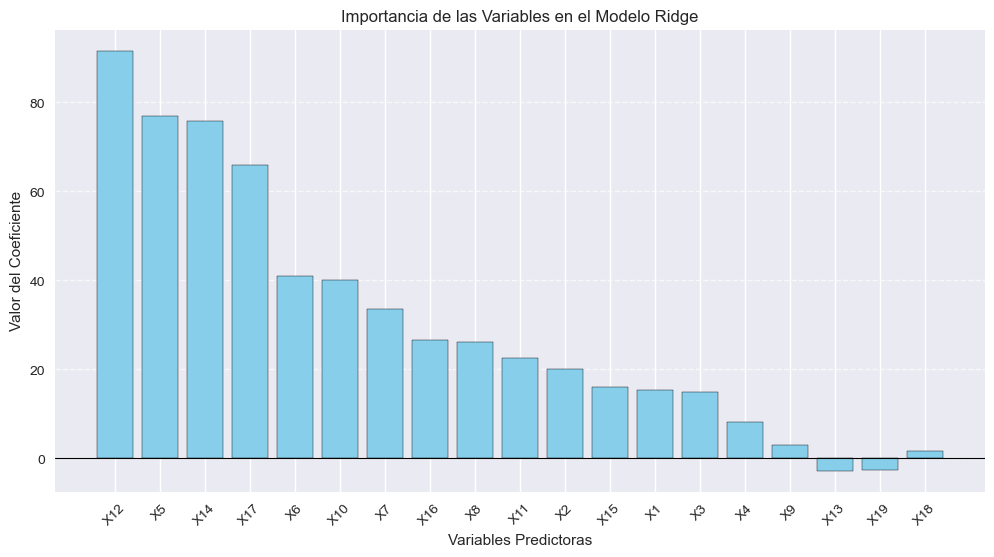

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df_coeficientes['Variable'], df_coeficientes['Coeficiente Ridge'], 
        color='skyblue', edgecolor='black')

plt.axhline(0, color='black', linewidth=0.8) # Línea en el cero
plt.title('Importancia de las Variables en el Modelo Ridge')
plt.xlabel('Variables Predictoras')
plt.ylabel('Valor del Coeficiente')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Regresión Lasso

La Regresión Lasso (Least Absolute Shrinkage and Selection Operator) es otra técnica de regularización. Al igual que Ridge, añade una penalización a la función de coste del modelo para evitar el sobreajuste, pero con una diferencia clave en su comportamiento matemático.

##### Penalizacion L1
Lasso utiliza el valor absoluto de los coeficientes como penalización. Es decir, mientras que Ridge intenta que todos los coeficientes sean pequeños, Lasso empuja a muchos de ellos a ser exactamente cero. de otra forma, a las 19 variables originales, se ve que el modelo de Lasso "apaga" las que tienen poca relación con $y$ (como $X_9$, $X_{13}$ o $X_{18}$), de forma similar a lo que se hace manualmente con el algoritmo stepwise.

##### El Parámetro $\alpha$ 
     Si :$\alpha$ pequeño: El modelo se comporta como una regresión lineal normal.
     Si $\alpha$ grande: La penalización es tan fuerte que el modelo empieza a eliminar variables. 
     Si $\alpha$ es demasiado alto, podrías quedarte con un modelo que solo tiene el intercepto.

In [43]:
# Probar distintos valores de alpha para Lasso
alphas_lasso = [0.0001, 0.001, 0.01, 0.1, 1, 10]
lasso_scores = []
lasso_models = []

for alpha in alphas_lasso:
    lasso = Lasso(alpha=alpha, random_state=7268358, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_models.append(lasso)
    
    # Predicciones y MSE
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    lasso_scores.append(mse)
    
    # Contar variables no cero
    n_nonzero = np.sum(lasso.coef_ != 0)
    print(f"Alpha={alpha}: MSE={mse:.4f}, Variables no cero: {n_nonzero}")

# Encontrar mejor alpha
best_lasso_idx = np.argmin(lasso_scores)
best_lasso_alpha = alphas_lasso[best_lasso_idx]
best_lasso_mse = lasso_scores[best_lasso_idx]

print(f"\nMejor alpha para Lasso: {best_lasso_alpha} con MSE={best_lasso_mse:.4f}")


Alpha=0.0001: MSE=5511.3419, Variables no cero: 19
Alpha=0.001: MSE=5511.3963, Variables no cero: 19
Alpha=0.01: MSE=5511.9589, Variables no cero: 19
Alpha=0.1: MSE=5517.6732, Variables no cero: 19
Alpha=1: MSE=5589.8820, Variables no cero: 19
Alpha=10: MSE=7293.1395, Variables no cero: 14

Mejor alpha para Lasso: 0.0001 con MSE=5511.3419


Se observa que con el valor de $\alpha$ pequeño, Lasso mantiene las 19 variables activas. Solo cuando sube a $\alpha$ = 10, el modelo apaga 5 variables. Esto significa que las variables generados son suficientes fuerte para que Lasso necesita una penalización alta para decidir eliminarlas. El hecho de que con $\alpha$ = 10, el $MSE$ suba a 7293, lo que esta deciendo que el modelo está perdiendo información útil y que es probablamente provocar subajuste.

# Regresión con Red Elástica
La Red Elástica (Elastic Net) es una técnica de regresión lineal regularizada que combina las dos penalizaciones más populares del Machine Learning: Lasso (L1) y Ridge (L2).
$Loss=Error + \alpha . [ r . \sum |w| + \frac{1-r}{2} . \sum w^2]$

Parar que el modelo funciona, debe encontrar dos valores claves:

##### $\alpha$: es la intesidad total de la penalización.
    Si $\alpha$ = 0, tiene una regresion lineal normal.
    Si $\alpha$ es grande, se encogen los coeficientes.

##### L1_ratio (r): Es el parametro de mezcla o balance:
    Si r=1: el modelo se cmporta exactamente como Lasso.
    Si r=0: el modelo se comporta exactamente como Ridge.
    Si r=0.5: el modelo aplica un 50% de fuerza Lasso y un 50% de fuerza Ridge.

In [44]:



# 2. Definir parámetros
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# 3. Búsqueda en grid con validación cruzada
grid_search = GridSearchCV(
    ElasticNet(random_state=7268358, max_iter=10000), 
    param_grid, 
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_test, y_test)

# --- NUEVA SECCIÓN: Mostrar todas las combinaciones ---
# Convertimos los resultados a un DataFrame de Pandas
resultados_df = pd.DataFrame(grid_search.cv_results_)

# Limpiamos el DataFrame para mostrar solo lo importante
# Multiplicamos por -1 porque sklearn usa el negativo del MSE
tabla_completa = resultados_df[['param_alpha', 'param_l1_ratio', 'mean_test_score']]
tabla_completa.columns = ['Alpha', 'L1_ratio (r)', 'MSE Promedio']
tabla_completa['MSE Promedio'] = -tabla_completa['MSE Promedio']

print("=== RECORRIDO DE PARÁMETROS (GRID SEARCH) ===")
print(tabla_completa.sort_values(by='MSE Promedio').to_string(index=False))




=== RECORRIDO DE PARÁMETROS (GRID SEARCH) ===
  Alpha  L1_ratio (r)  MSE Promedio
 0.1000           0.7   7027.689264
 0.1000           0.5   7046.957353
 0.1000           0.9   7099.720786
 0.0100           0.1   7117.836796
 0.1000           0.3   7130.135151
 0.0100           0.3   7133.345065
 0.0100           0.5   7150.272229
 0.0100           0.7   7168.672347
 0.0100           0.9   7188.606285
 0.0010           0.1   7191.371261
 0.0010           0.3   7193.472739
 0.0010           0.5   7195.590122
 0.0010           0.7   7197.723999
 0.0010           0.9   7199.874015
 0.0001           0.1   7200.159982
 0.0001           0.3   7200.376091
 0.0001           0.5   7200.592370
 0.0001           0.7   7200.808734
 0.0001           0.9   7201.025371
 0.1000           0.1   7258.786832
 1.0000           0.9   7496.568501
 1.0000           0.7   9789.497620
 1.0000           0.5  12126.034213
 1.0000           0.3  14159.030768
 1.0000           0.1  15944.644075
10.0000           

# Comparaciones

=== RANKING FINAL DE ERROR (Menor es mejor) ===
              Modelo         MSE
        Red Elástica 5413.920653
               Ridge 5430.496405
      OLS (Completo) 5511.336545
               Lasso 5519.886759
Stepwise (Selectivo) 5524.050786


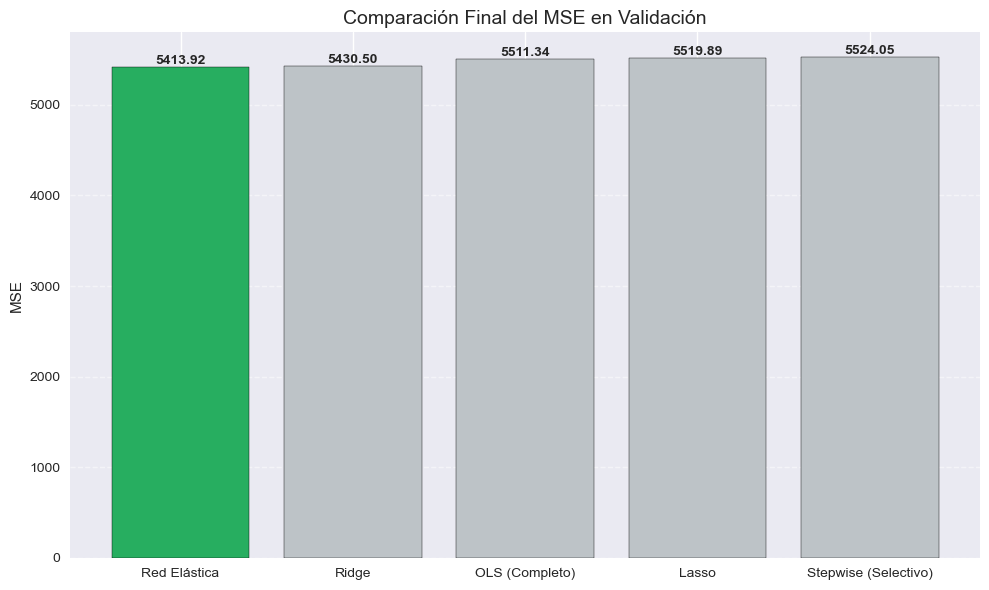


✅ RESPUESTA: El modelo que minimiza el error es **Red Elástica**.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# --- 1. PREPARACIÓN SEGURA DE VARIABLES ---
models_mse = {}

# Intentamos recuperar el modelo OLS (puede llamarse 'results' o 'model')
try:
    ols_curr = results 
except NameError:
    ols_curr = model 

# --- 2. CÁLCULO DE ERRORES ---

# A. OLS COMPLETO
X_test_const = sm.add_constant(X_test)
y_pred_ols = ols_curr.predict(X_test_const)
models_mse['OLS (Completo)'] = mean_squared_error(y_test, y_pred_ols)

# B. STEPWISE 
# --- CORRECCIÓN DEL ERROR AQUÍ ---
# Obtenemos los p-values
p_vals = ols_curr.pvalues

# Si p_vals es un array de numpy (sin nombres), le ponemos nombres manualmente
if not isinstance(p_vals, pd.Series):
    # Generamos nombres: 'const' + 'x1', 'x2', etc.
    # Asumimos que la constante es la primera columna (estándar en statsmodels)
    nombres = ['const'] + [f'x{i+1}' for i in range(len(p_vals)-1)]
    p_vals = pd.Series(p_vals, index=nombres)

# Ahora sí podemos filtrar por nombre usando .index
vars_significativas = p_vals[p_vals < 0.05].index.tolist()

# Quitamos 'const' de la lista porque sm.add_constant la agregará después
if 'const' in vars_significativas:
    vars_significativas.remove('const')

# Filtramos X_test y X_train usando los nombres
# NOTA: Si X_test es un array numpy, necesitamos convertir índices numéricos
if isinstance(X_test, np.ndarray):
    # Mapeo de nombres 'x1' -> índice 0, 'x2' -> índice 1...
    indices_cols = [int(v.replace('x', ''))-1 for v in vars_significativas]
    X_train_step = X_train[:, indices_cols]
    X_test_step = X_test[:, indices_cols]
else:
    # Si es DataFrame, usamos los nombres directos
    X_train_step = X_train[vars_significativas]
    X_test_step = X_test[vars_significativas]

# Re-entrenamos un modelo pequeño solo con las variables significativas para obtener predicción limpia
model_stepwise_final = sm.OLS(y_train, sm.add_constant(X_train_step)).fit()
y_pred_stepwise = model_stepwise_final.predict(sm.add_constant(X_test_step))
models_mse['Stepwise (Selectivo)'] = mean_squared_error(y_test, y_pred_stepwise)

# C. RIDGE
best_ridge = ridge_models[best_ridge_idx]
y_pred_ridge = best_ridge.predict(X_test_scaled)
models_mse['Ridge'] = mean_squared_error(y_test, y_pred_ridge)

# D. LASSO
best_lasso = lasso_models[best_lasso_idx]
y_pred_lasso = best_lasso.predict(X_test_scaled)
models_mse['Lasso'] = mean_squared_error(y_test, y_pred_lasso)

# E. RED ELÁSTICA
try:
    y_pred_elastic = best_elastic.predict(X_test_scaled)
    models_mse['Red Elástica'] = mean_squared_error(y_test, y_pred_elastic)
except NameError:
    print("Aviso: Modelo Red Elástica no encontrado en memoria.")

# --- 3. RESULTADOS Y GRÁFICA ---
comparison_df = pd.DataFrame(list(models_mse.items()), columns=['Modelo', 'MSE'])
comparison_df = comparison_df.sort_values('MSE').reset_index(drop=True)

print("=== RANKING FINAL DE ERROR (Menor es mejor) ===")
print(comparison_df.to_string(index=False))

# Gráfico
plt.figure(figsize=(10, 6))
colores = ['#27ae60' if i == 0 else '#bdc3c7' for i in range(len(comparison_df))]
bars = plt.bar(comparison_df['Modelo'], comparison_df['MSE'], color=colores, edgecolor='black')

plt.title('Comparación Final del MSE en Validación', fontsize=14)
plt.ylabel('MSE')
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

ganador = comparison_df.iloc[0]['Modelo']
print(f"\n✅ RESPUESTA: El modelo que minimiza el error es **{ganador}**.")